
**Add useful Libraries and data reading**



In [1]:
import pandas as pd
import numpy as np
import plotnine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


data = pd.read_excel("Dataset2Use_Assignment1.xlsx")
#change Column Names
data2=data #create 2 DataFrames: one with normal column names one with easir to read
normal_col_names = data.columns
new_col_names = ['index1', 'index2', 'index3' , 'index4' , 'index5' ,'index6', 'index7', 'index8', 'bin_index1', 'bin_index2' , 'bin_index3' , 'status' , 'year']
data2.columns = new_col_names


**Ploting Figures**


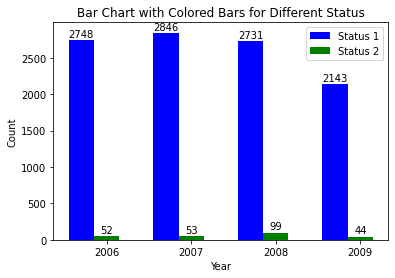

In [2]:
###1
###plot figure 1
grouped_1 =(data.groupby(['status', 'year']).size().unstack(fill_value=0))

fig, ax = plt.subplots()
width = 0.3  # Width of the bars

years = grouped_1.columns
statuses = grouped_1.index
#bottom = np.zeros(len(years))
colors = ['b', 'g']  # Color for status 1 and 2
#bar_positions =  # Initialize bar positions

for i, status in enumerate(statuses):
  bar_positions = [year + i * width for year in years]
  bars = ax.bar(bar_positions, grouped_1.loc[status], width, label=f'Status {status}', color=colors[i])
  ax.bar_label(bars, padding=1)
  #bottom+=status



# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Bar Chart with Colored Bars for Different Status')

# Set x-axis ticks and labels
ax.set_xticks([year + width for year in years])
ax.set_xticklabels(years)

# Add a legend
ax.legend()

# Display the plot
plt.show()



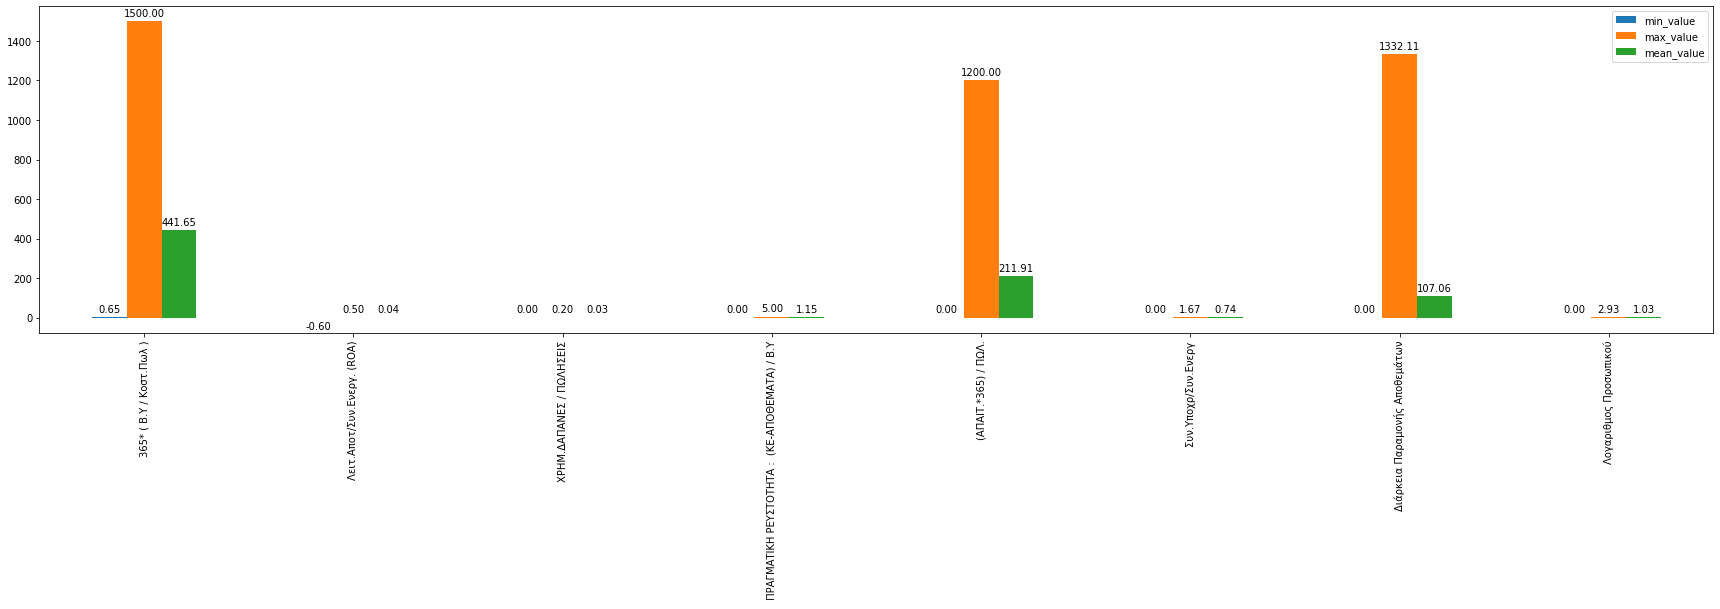

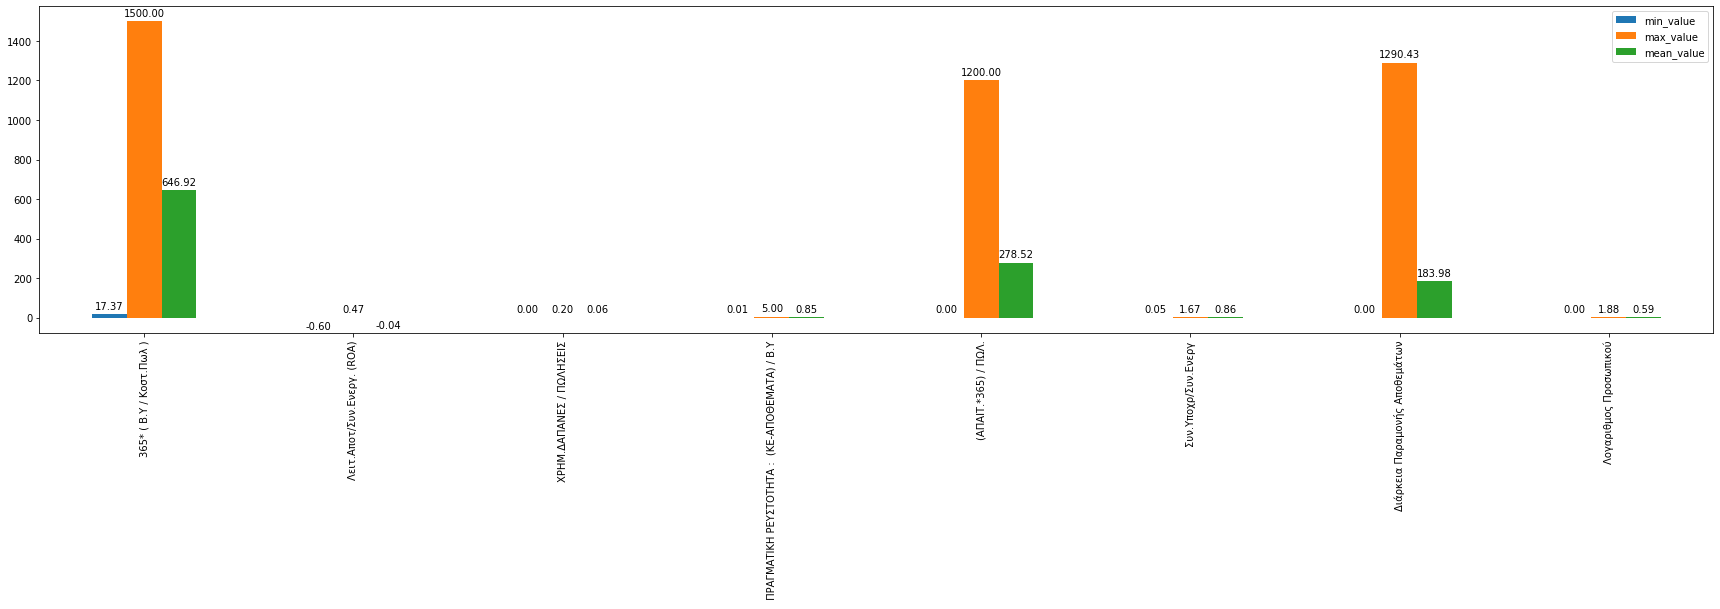

"\n# Plot the data as a bar chart\nax = data.plot(kind='bar')\n\n# Add labels for the values on top of the bars\nfor i, v in enumerate(data):\n    ax.text(i, v, str(v), ha='center', va='bottom')\nplt.show()\n"

In [3]:
###plot figure 2

#seperate in 2 dataframes, depends on status for every company
normal_companies = data2[data2.status==1].drop(columns= ['bin_index1', 'bin_index2', 'bin_index3', 'year','status'])
closed_companies = data2[data2.status==2].drop(columns= ['bin_index1', 'bin_index2', 'bin_index3', 'year','status'])
#chancge column names to normal ones
normal_companies.columns = normal_col_names[0:8]
closed_companies.columns = normal_col_names[0:8]

normal_companies_metrics=pd.DataFrame()
closed_companies_metrics=pd.DataFrame()
#compute min,max,avg
#for normal companies
normal_companies_metrics['min_value']=normal_companies.min()
normal_companies_metrics['max_value'] = normal_companies.max()
normal_companies_metrics['mean_value'] = normal_companies.mean()
#for closed companies
closed_companies_metrics['min_value']=closed_companies.min()
closed_companies_metrics['max_value'] = closed_companies.max()
closed_companies_metrics['mean_value'] = closed_companies.mean()



#Plot all indexes and values

#normal_companies_metrics
ax = normal_companies_metrics.plot(kind='bar', figsize=(30, 6))  # Adjust the figure size as needed
for container in ax.containers: # Add labels for the values on top of the bars
    ax.bar_label(container, fmt='%.2f', padding=3) #formatting the values to two decimal places (%.2f)
plt.show

#closed_companies_metrics
ax = closed_companies_metrics.plot(kind='bar', figsize=(30, 6))  # Adjust the figure size as needed
for container in ax.containers: # Add labels for the values on top of the bars
    ax.bar_label(container, fmt='%.2f', padding=3) #formatting the values to two decimal places (%.2f)
plt.show()



#bc its not seem good, will plot one for every index
#data_plot = normal_companies_metrics.loc['index1']
'''
# Plot the data as a bar chart
ax = data.plot(kind='bar')

# Add labels for the values on top of the bars
for i, v in enumerate(data):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()
'''


**Data Quality Assurance**

In [4]:
###3
#Sum on Nans with isna()
na_sum = data.isna().sum()

#Print results
print("Summary of NaNs for every index: \n" , na_sum)
print("\n Secure that dont has missing values")

Summary of NaNs for every index: 
 index1        0
index2        0
index3        0
index4        0
index5        0
index6        0
index7        0
index8        0
bin_index1    0
bin_index2    0
bin_index3    0
status        0
year          0
dtype: int64

 Secure that dont has missing values


**Normalize Data to range [0,1]**

In [5]:
###4
#Normalize with MinMaxScaler()
scaler = MinMaxScaler()

#Fit and transform the data to the [0, 1] range
normalized_data = scaler.fit_transform(data.drop(columns=['year']))

#Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=data.drop(columns=['year']).columns)



**Classification in Unbalanced Train Set**



Fold:1- Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.966903073286052 - Recall: 0.08602150537634409 - F1 : 0.10738255033557047 - AUC-ROC : 0.8446181090553494


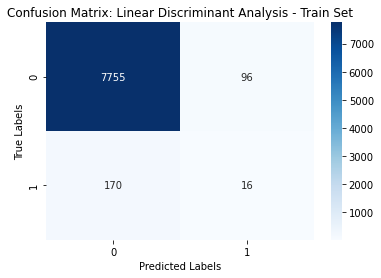

AttributeError: 'DataFrame' object has no attribute 'concat'

In [10]:
###5
#Implementation of models

from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier #personal choice
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report



#Using StratifiesKFold()
skf4 = StratifiedKFold(n_splits=4, shuffle=True , random_state=42)

#Create train and test dataset
X=normalized_df.drop('status' , axis=1)
y=normalized_df['status']

#Initialization of models
models = {'Linear Discriminant Analysis' : LinearDiscriminantAnalysis()  , 'Logistic Regression' : LogisticRegression() , 'Decision Tree':tree.DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier(), 'kNN':KNeighborsClassifier(), 'Naive Bayes' : GaussianNB(), 'SVM':SVC(probability = True), 'MLP':MLPClassifier() }
columns= ["Classifier Name" , "Training or Test Set" , "Balanced or UnBalanced Train Set" , "Number of Training Samples" , "Number of non-healthy in training sample", "TP", "TN", "FP", "FN" , "ROC-AUC" ]
results = pd.DataFrame(columns = columns)



for fold, (train_index, test_index) in enumerate (skf4.split(X,y),1):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  #print(f"Fold {fold}:")
  #print(f"Train - Healthy companies: {y_train[y_train==0].count()}, Bankrupt companies: {y_train[y_train==1].count()}")
  #print(f"Test - Healthy companies: {y_test[y_test==0].count()}, Bankrupt companies: {y_test[y_test==1].count()}")
  #print("\n")
  for model_name,model in models.items():
    model.fit(X_train , y_train)

    #Train predictions, confusion matrix , scores
    train_predictions = model.predict(X_train)
    train_cm = confusion_matrix(y_train , train_predictions)
    train_tp, train_tn, train_fp, train_fn = train_cm[1, 1], train_cm[0, 0], train_cm[0, 1], train_cm[1, 0]
    train_accuracy = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
    train_precision = (train_tp)/(train_tp + train_fp)
    train_recall = train_tp / (train_tp + train_fn)
    train_f1 = (2*train_tp) / (2*train_tp + train_fp + train_fn)
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    print(f"Fold:{fold}- Model:{model_name}- Train Set - Accuracy: {train_accuracy} - Recall: {train_recall} - F1 : {train_f1} - AUC-ROC : {train_roc_auc}")
    #print(train_tp , train_fp, train_fn, train_tn)
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {model_name} - Train Set")
    plt.show()
    result = [model_name , "Train Set" , "Unbalanced Set" , len(y_train), y_train[y_train==0].count(), train_tp, train_tn, train_fp, train_fn, train_roc_auc]
    results = results.append(pd.Series(result, index=results.columns), ignore_index=True)


    #Test prediction, confusion matrix, scores
    test_predictions = model.predict(X_test)
    test_cm = confusion_matrix(y_test , test_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_tp, test_tn, test_fp, test_fn = test_cm[1, 1], test_cm[0, 0],  test_cm[0, 1], test_cm[1, 0]
    test_accuracy = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
    test_precision = (test_tp)/(test_tp + test_fp)
    test_recall = test_tp / (test_tp + test_fn)
    test_f1 = (2*test_tp) / (2*test_tp + test_fp + test_fn)
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Fold:{fold}- Model:{model_name}- Test Set - Accuracy: {test_accuracy} - Recall: {test_recall} - F1 : {test_f1} - AUC-ROC : {test_roc_auc}")
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {model_name} - Test Set")
    plt.show()
    result = [model_name , "Test Set" , "Unbalanced Set" , len(y_test), y_test[y_test==0].count(), test_tp, test_tn, test_fp, test_fn, test_roc_auc]
    results = results.append(pd.Series(result, index=results.columns), ignore_index=True)










****Classification in Balanced Set****


Fold 1:
Train - Healthy companies: 558, Bankrupt companies: 186
Test - Healthy companies: 3175, Bankrupt companies: 62


Fold:1- Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.8091397849462365 - Recall: 0.42473118279569894 - F1 : 0.5266666666666666 - AUC-ROC : 0.8669306663583459


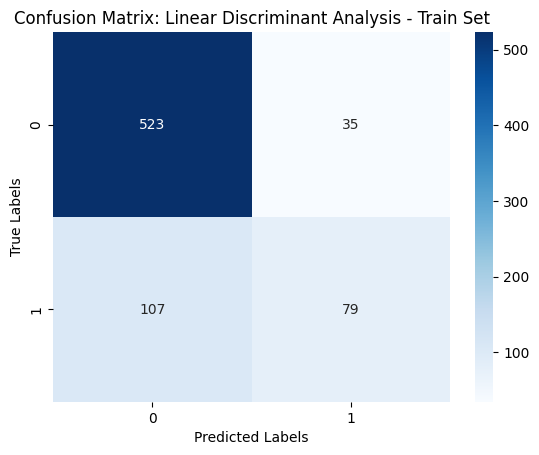

Fold:1- Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.9122644423849243 - Recall: 0.5 - F1 : 0.1791907514450867 - AUC-ROC : 0.8327914655829312


<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


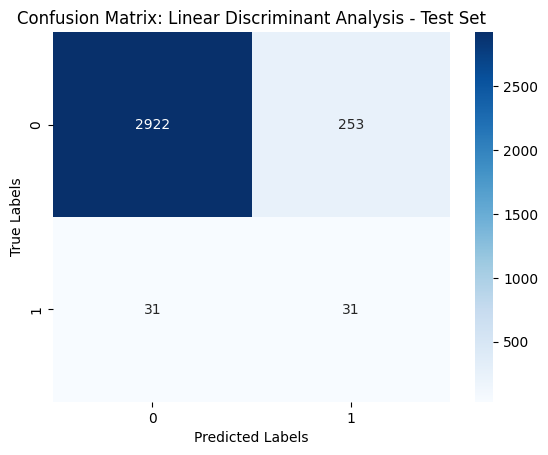

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:Logistic Regression- Train Set - Accuracy: 0.7997311827956989 - Recall: 0.3709677419354839 - F1 : 0.4808362369337979 - AUC-ROC : 0.8653986973445871


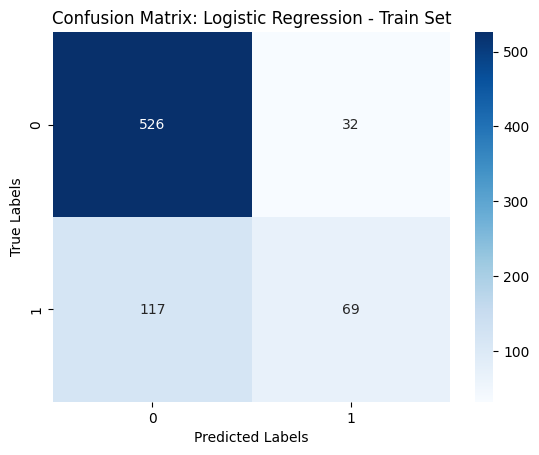

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:Logistic Regression- Test Set - Accuracy: 0.9230769230769231 - Recall: 0.4838709677419355 - F1 : 0.1941747572815534 - AUC-ROC : 0.8373380746761493


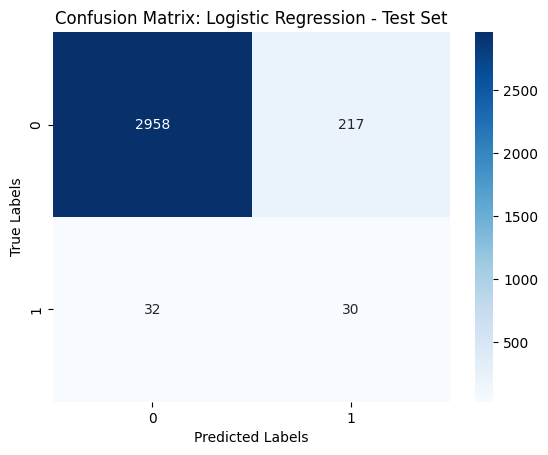

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:Decision Tree- Train Set - Accuracy: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


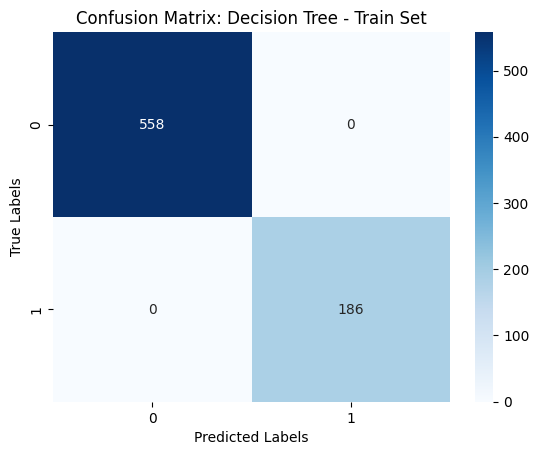

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:Decision Tree- Test Set - Accuracy: 0.835032437442076 - Recall: 0.5483870967741935 - F1 : 0.11295681063122924 - AUC-ROC : 0.694508509017018


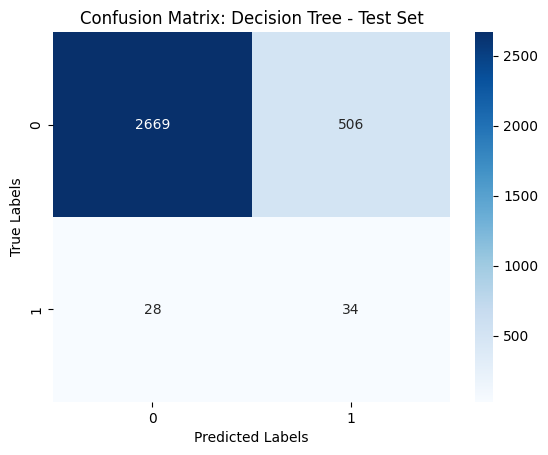

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:Random Forest- Train Set - Accuracy: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


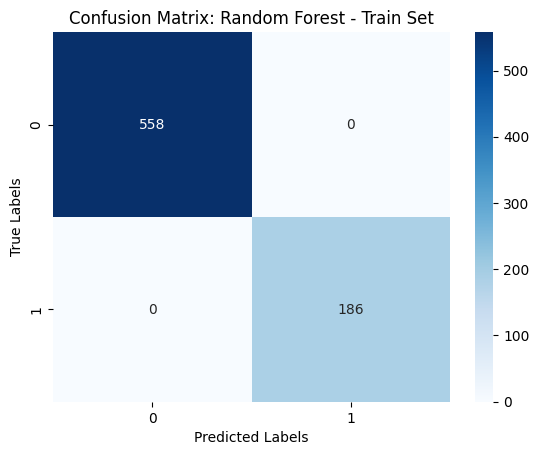

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:Random Forest- Test Set - Accuracy: 0.9258572752548656 - Recall: 0.5645161290322581 - F1 : 0.22580645161290322 - AUC-ROC : 0.8826441452882905


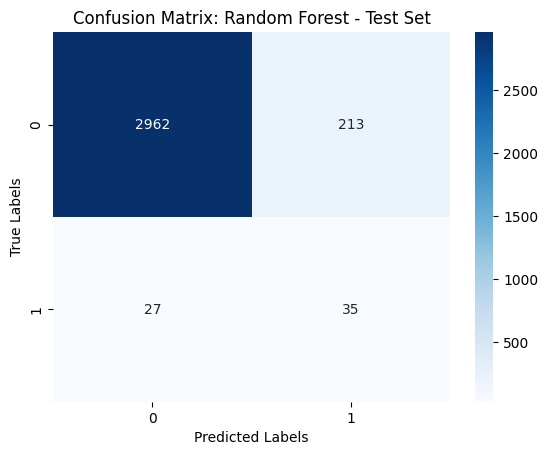

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:kNN- Train Set - Accuracy: 0.8494623655913979 - Recall: 0.6182795698924731 - F1 : 0.672514619883041 - AUC-ROC : 0.9147926542567542


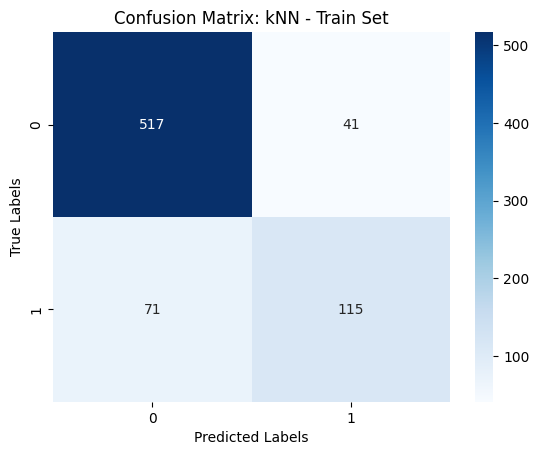

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:kNN- Test Set - Accuracy: 0.8838430645659562 - Recall: 0.532258064516129 - F1 : 0.1493212669683258 - AUC-ROC : 0.8251993903987809


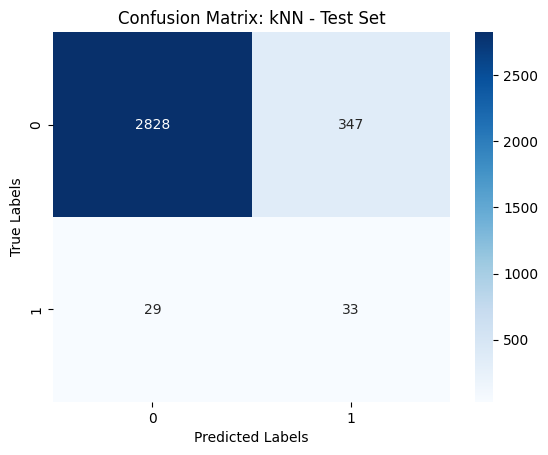

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:Naive Bayes- Train Set - Accuracy: 0.793010752688172 - Recall: 0.46236559139784944 - F1 : 0.5276073619631901 - AUC-ROC : 0.8509172544032065


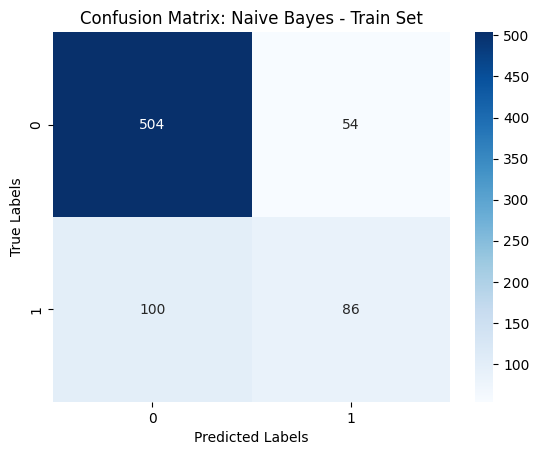

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:Naive Bayes- Test Set - Accuracy: 0.8810627123880136 - Recall: 0.4838709677419355 - F1 : 0.1348314606741573 - AUC-ROC : 0.8272186944373889


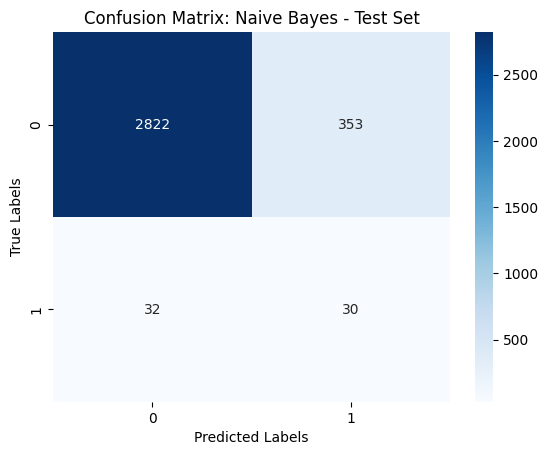

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:SVM- Train Set - Accuracy: 0.8373655913978495 - Recall: 0.510752688172043 - F1 : 0.6109324758842444 - AUC-ROC : 0.8959802674683007


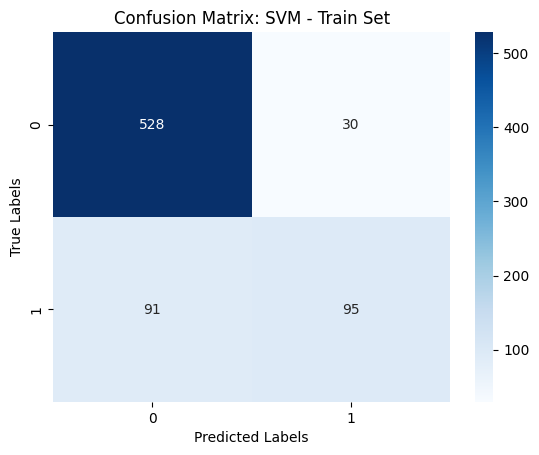

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:SVM- Test Set - Accuracy: 0.9212233549582948 - Recall: 0.5161290322580645 - F1 : 0.2006269592476489 - AUC-ROC : 0.851262382524765


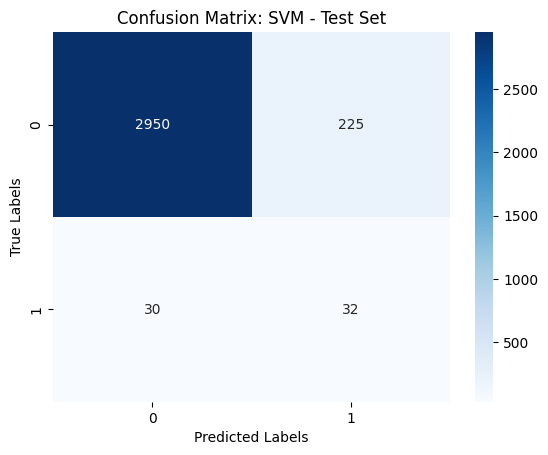

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Fold:1- Model:MLP- Train Set - Accuracy: 0.8481182795698925 - Recall: 0.5806451612903226 - F1 : 0.6565349544072948 - AUC-ROC : 0.8904690330288665


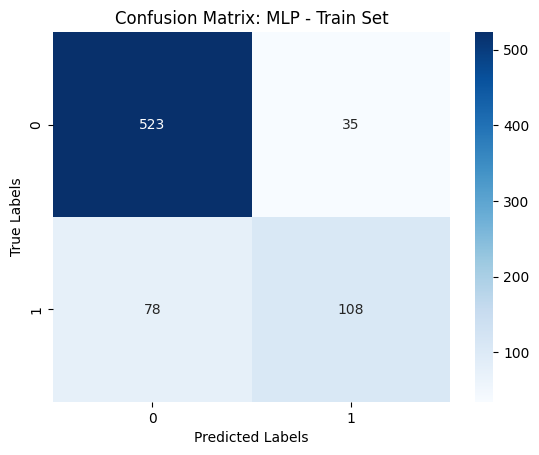

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:1- Model:MLP- Test Set - Accuracy: 0.9026876737720111 - Recall: 0.6290322580645161 - F1 : 0.1984732824427481 - AUC-ROC : 0.8505715011430023


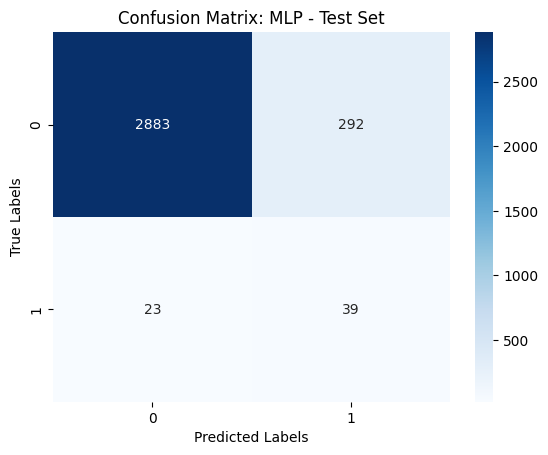

Fold 2:
Train - Healthy companies: 558, Bankrupt companies: 186
Test - Healthy companies: 3175, Bankrupt companies: 62


Fold:2- Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.7956989247311828 - Recall: 0.3763440860215054 - F1 : 0.4794520547945205 - AUC-ROC : 0.8341137703780784


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


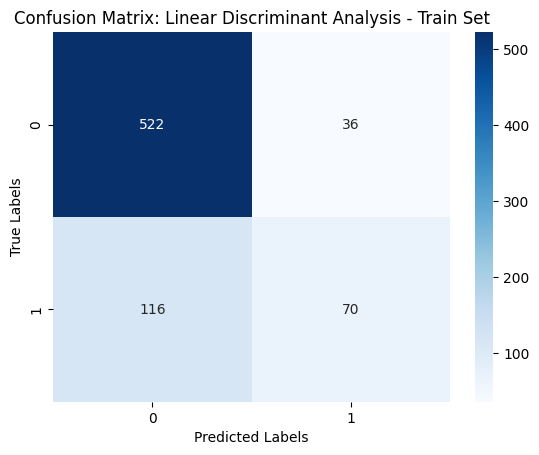

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.9240037071362373 - Recall: 0.5 - F1 : 0.2012987012987013 - AUC-ROC : 0.8684328168656337


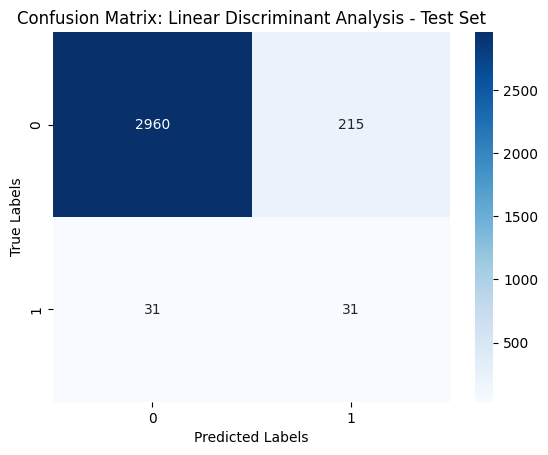

Fold:2- Model:Logistic Regression- Train Set - Accuracy: 0.7876344086021505 - Recall: 0.3064516129032258 - F1 : 0.41911764705882354 - AUC-ROC : 0.8315701237137241


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


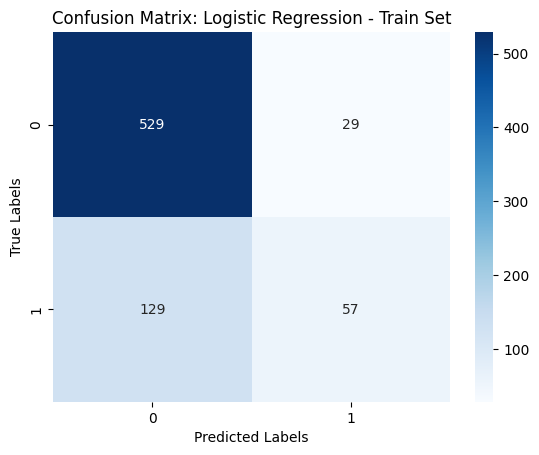

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:Logistic Regression- Test Set - Accuracy: 0.9354340438677788 - Recall: 0.43548387096774194 - F1 : 0.20532319391634982 - AUC-ROC : 0.8598780797561595


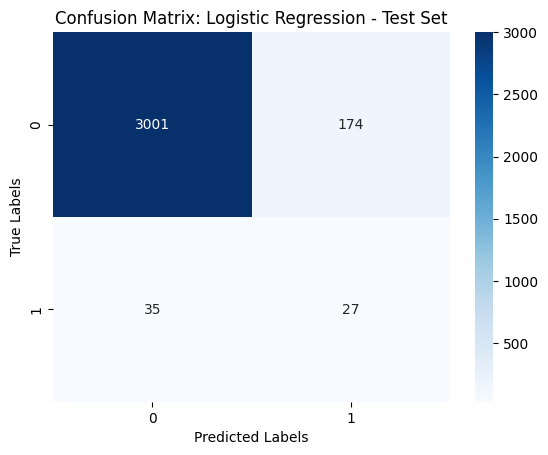

Fold:2- Model:Decision Tree- Train Set - Accuracy: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


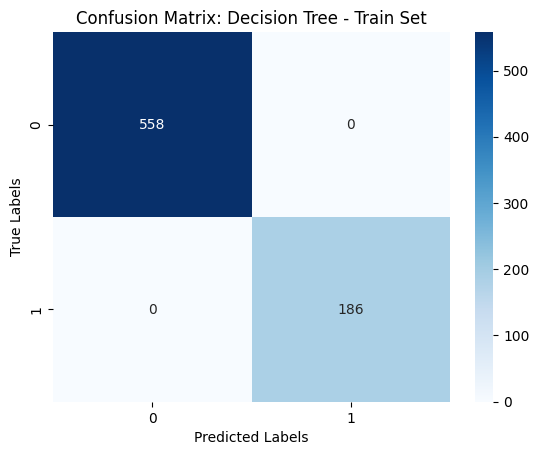

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:Decision Tree- Test Set - Accuracy: 0.8529502625888168 - Recall: 0.46774193548387094 - F1 : 0.10861423220973783 - AUC-ROC : 0.6641071882143764


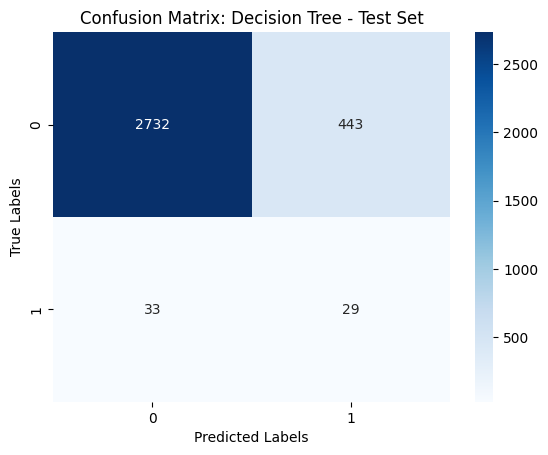

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:Random Forest- Train Set - Accuracy: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


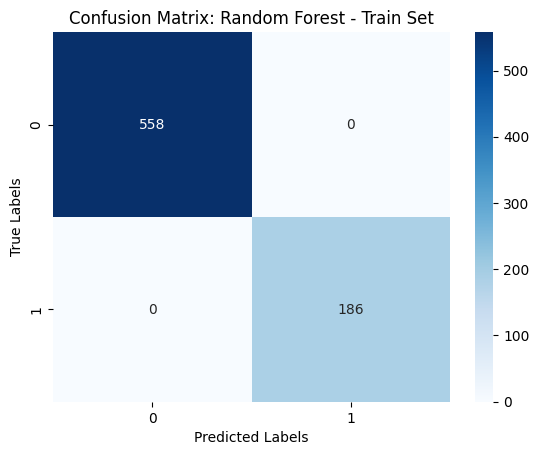

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:Random Forest- Test Set - Accuracy: 0.9394501081248069 - Recall: 0.5161290322580645 - F1 : 0.24615384615384617 - AUC-ROC : 0.8999872999745999


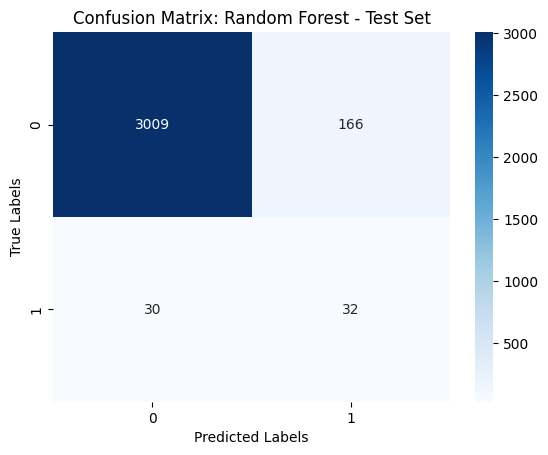

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:kNN- Train Set - Accuracy: 0.842741935483871 - Recall: 0.5806451612903226 - F1 : 0.6486486486486487 - AUC-ROC : 0.9083612749065404


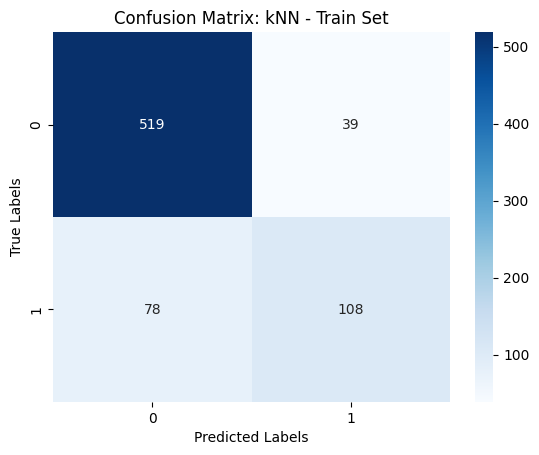

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:kNN- Test Set - Accuracy: 0.897126969416126 - Recall: 0.5 - F1 : 0.1569620253164557 - AUC-ROC : 0.8519177038354075


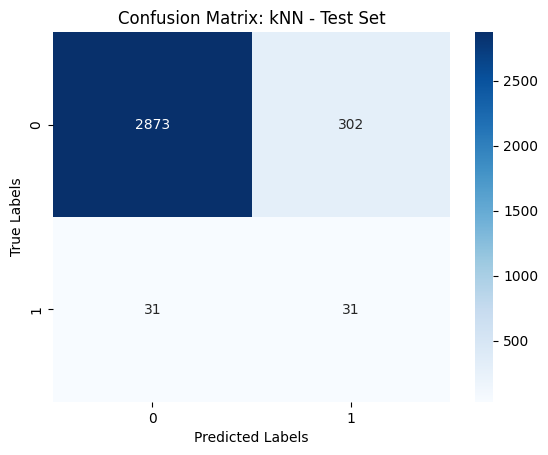

Fold:2- Model:Naive Bayes- Train Set - Accuracy: 0.7970430107526881 - Recall: 0.5483870967741935 - F1 : 0.5746478873239437 - AUC-ROC : 0.8264346552587968


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


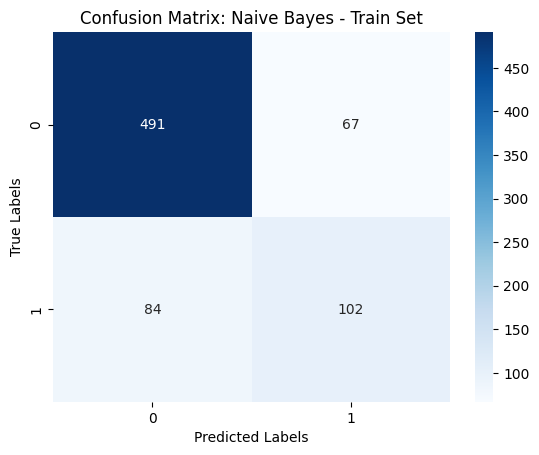

Fold:2- Model:Naive Bayes- Test Set - Accuracy: 0.8646895273401297 - Recall: 0.6935483870967742 - F1 : 0.16412213740458015 - AUC-ROC : 0.8451663703327408


<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


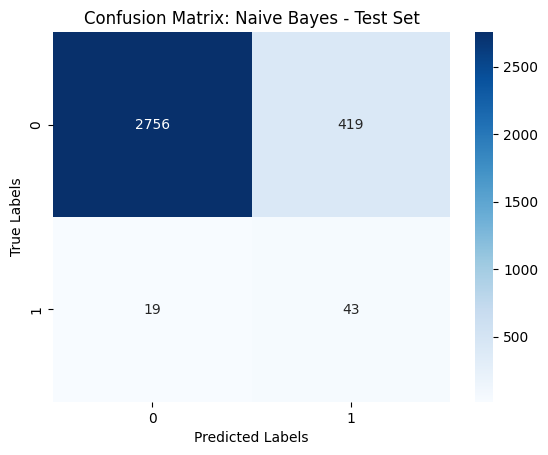

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:SVM- Train Set - Accuracy: 0.8198924731182796 - Recall: 0.3763440860215054 - F1 : 0.5109489051094891 - AUC-ROC : 0.8729910972366749


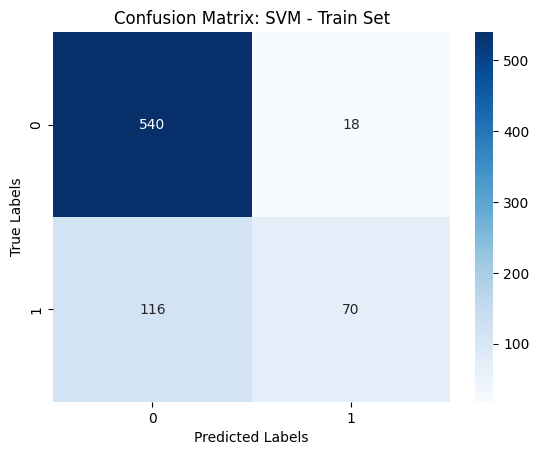

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:SVM- Test Set - Accuracy: 0.9474822366388631 - Recall: 0.45161290322580644 - F1 : 0.24778761061946902 - AUC-ROC : 0.8535966471932943


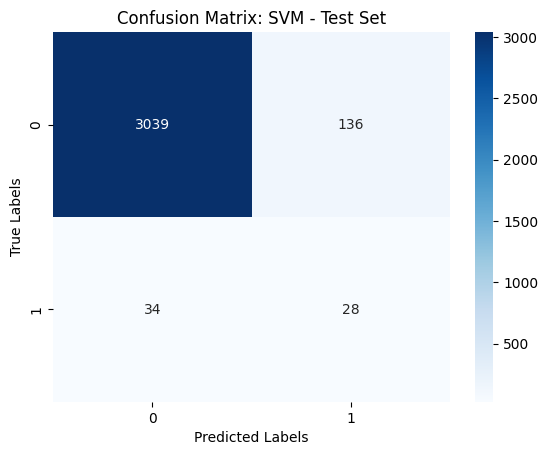

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:MLP- Train Set - Accuracy: 0.8131720430107527 - Recall: 0.4838709677419355 - F1 : 0.5642633228840125 - AUC-ROC : 0.860995490808186


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


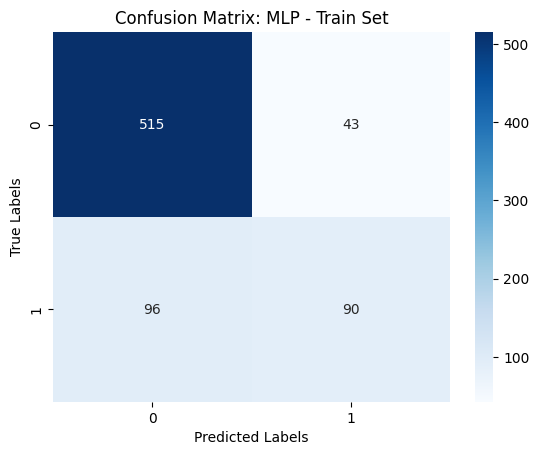

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:2- Model:MLP- Test Set - Accuracy: 0.9107198022860673 - Recall: 0.6129032258064516 - F1 : 0.20821917808219179 - AUC-ROC : 0.8723698247396494


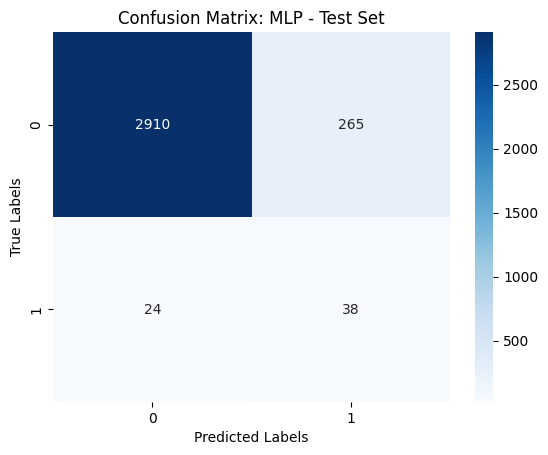

Fold 3:
Train - Healthy companies: 558, Bankrupt companies: 186
Test - Healthy companies: 3175, Bankrupt companies: 62


Fold:3- Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.8051075268817204 - Recall: 0.43548387096774194 - F1 : 0.5276872964169381 - AUC-ROC : 0.8501079122827302


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


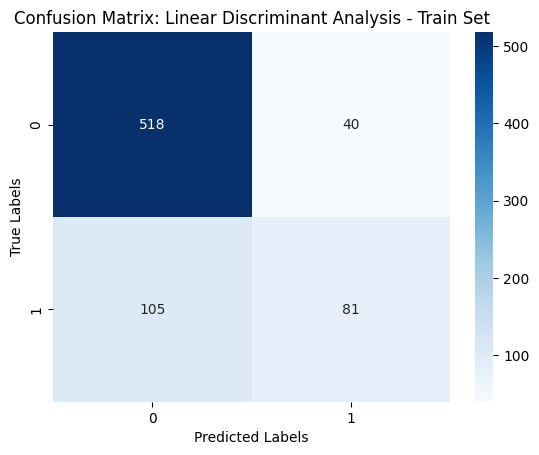

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.9181340747605807 - Recall: 0.3064516129032258 - F1 : 0.1254125412541254 - AUC-ROC : 0.7960985521971045


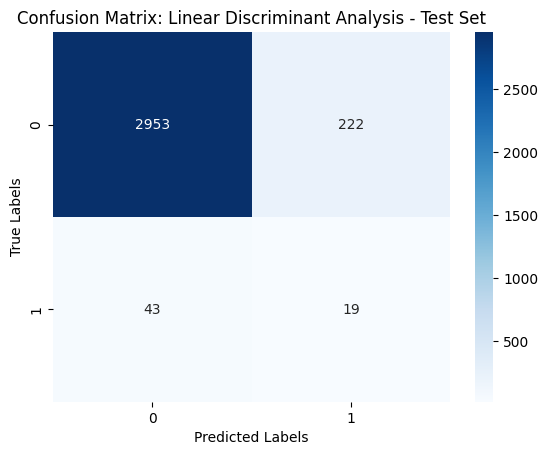

Fold:3- Model:Logistic Regression- Train Set - Accuracy: 0.8010752688172043 - Recall: 0.3817204301075269 - F1 : 0.4896551724137931 - AUC-ROC : 0.8484506879408025


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


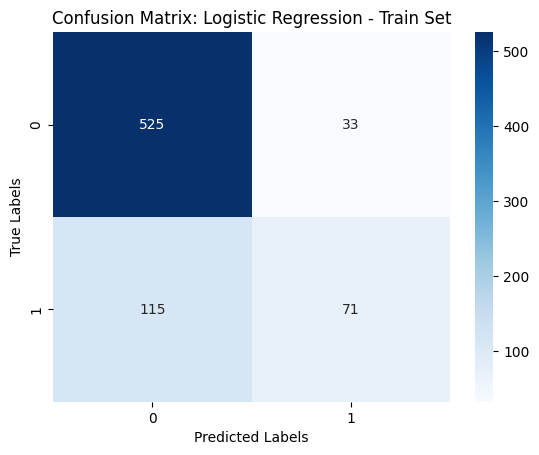

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:Logistic Regression- Test Set - Accuracy: 0.9243126351560087 - Recall: 0.22580645161290322 - F1 : 0.10256410256410256 - AUC-ROC : 0.7946355092710186


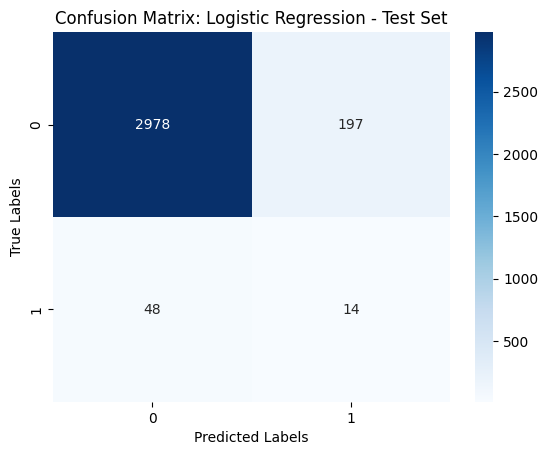

Fold:3- Model:Decision Tree- Train Set - Accuracy: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


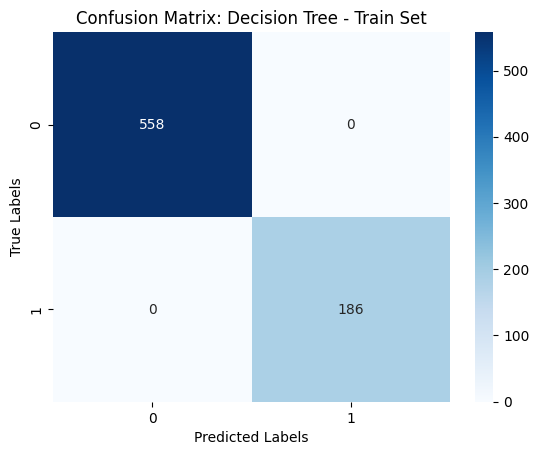

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:Decision Tree- Test Set - Accuracy: 0.8708680877355576 - Recall: 0.3870967741935484 - F1 : 0.10300429184549356 - AUC-ROC : 0.6337058674117348


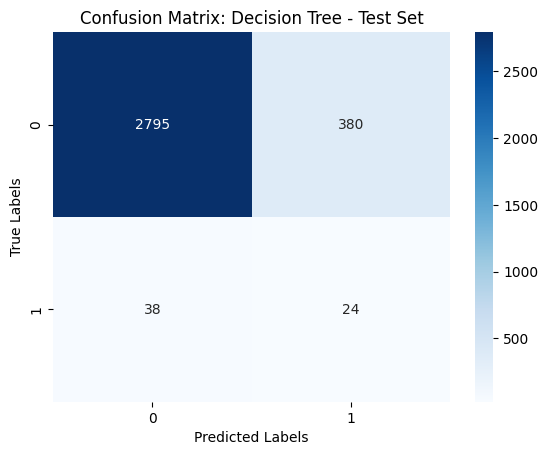

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:Random Forest- Train Set - Accuracy: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


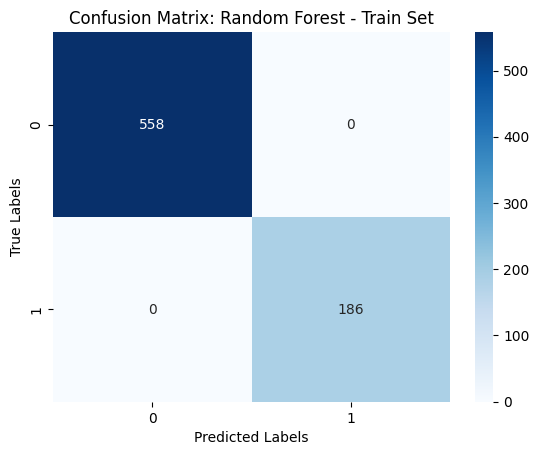

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:Random Forest- Test Set - Accuracy: 0.9308001235712079 - Recall: 0.3709677419354839 - F1 : 0.17037037037037037 - AUC-ROC : 0.8160553721107442


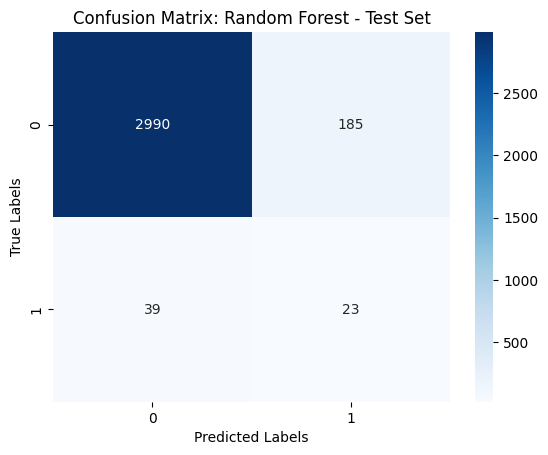

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:kNN- Train Set - Accuracy: 0.8494623655913979 - Recall: 0.5967741935483871 - F1 : 0.6646706586826348 - AUC-ROC : 0.91273557636721


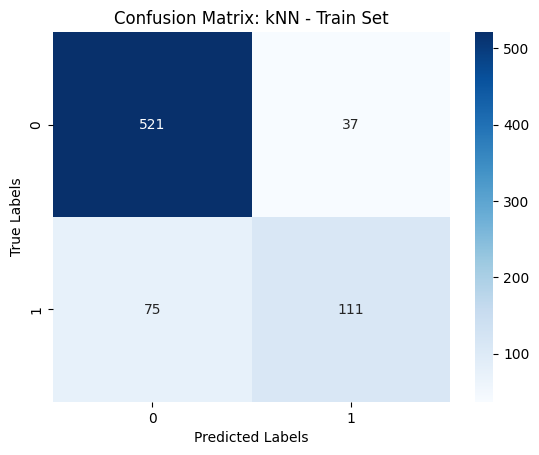

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:kNN- Test Set - Accuracy: 0.898671609514983 - Recall: 0.27419354838709675 - F1 : 0.09392265193370165 - AUC-ROC : 0.7321386842773686


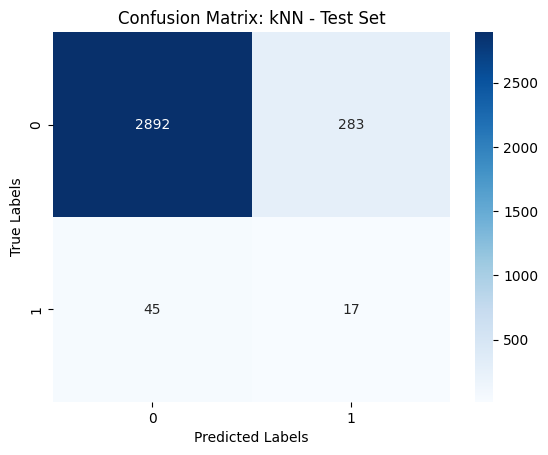

Fold:3- Model:Naive Bayes- Train Set - Accuracy: 0.7688172043010753 - Recall: 0.4946236559139785 - F1 : 0.5168539325842697 - AUC-ROC : 0.8265406405364782


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


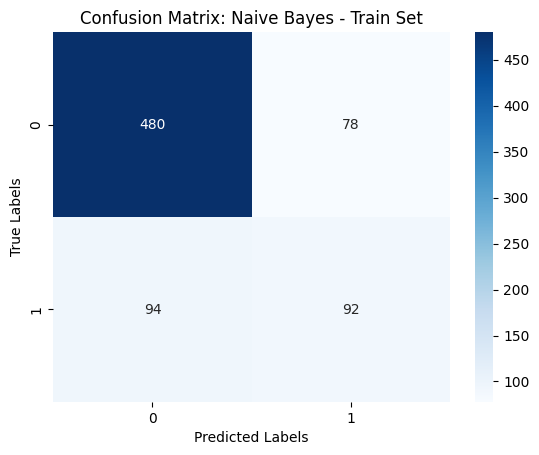

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:Naive Bayes- Test Set - Accuracy: 0.86252703120173 - Recall: 0.3548387096774194 - F1 : 0.08997955010224949 - AUC-ROC : 0.770759461518923


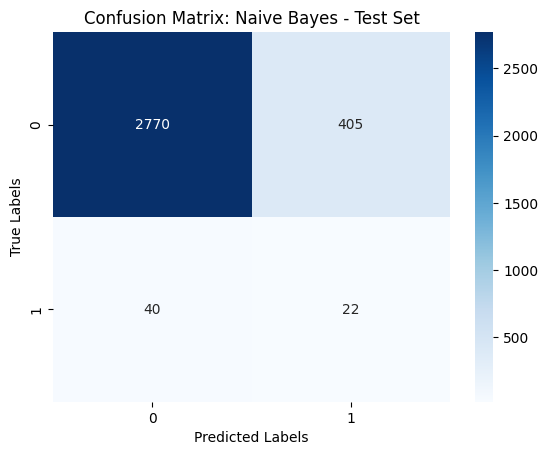

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:SVM- Train Set - Accuracy: 0.8333333333333334 - Recall: 0.45698924731182794 - F1 : 0.5782312925170068 - AUC-ROC : 0.8834980922650018


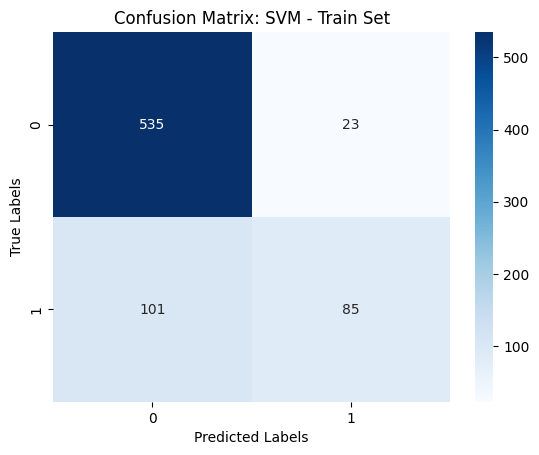

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:SVM- Test Set - Accuracy: 0.9351251158480074 - Recall: 0.24193548387096775 - F1 : 0.125 - AUC-ROC : 0.7959258318516638


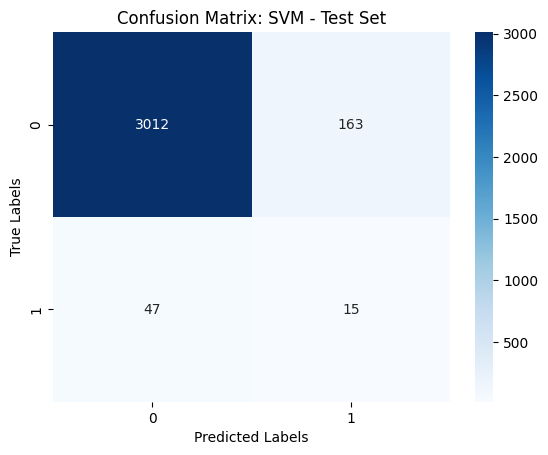

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:MLP- Train Set - Accuracy: 0.8293010752688172 - Recall: 0.5698924731182796 - F1 : 0.6253687315634219 - AUC-ROC : 0.8787143022314718


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


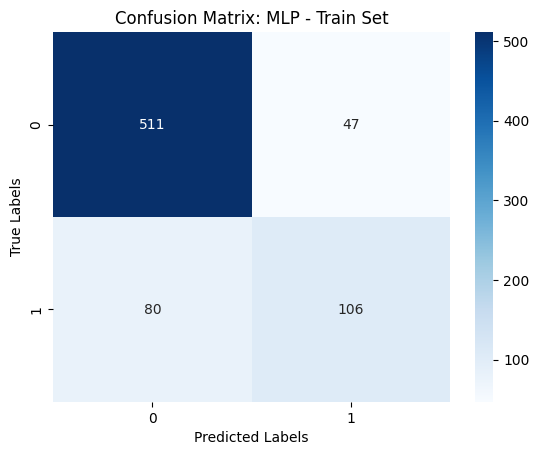

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:3- Model:MLP- Test Set - Accuracy: 0.9070126660488106 - Recall: 0.3387096774193548 - F1 : 0.12244897959183673 - AUC-ROC : 0.8076555753111506


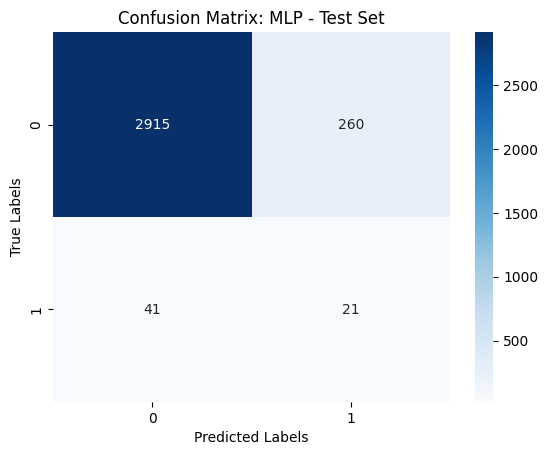

Fold 4:
Train - Healthy companies: 558, Bankrupt companies: 186
Test - Healthy companies: 3175, Bankrupt companies: 62


Fold:4- Model:Linear Discriminant Analysis- Train Set - Accuracy: 0.8131720430107527 - Recall: 0.41397849462365593 - F1 : 0.5255972696245734 - AUC-ROC : 0.8477569661232511


<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


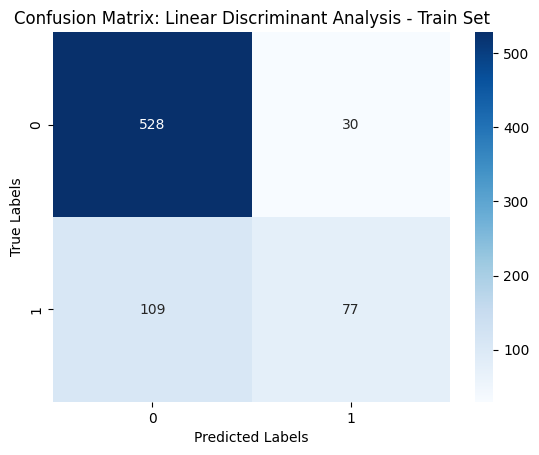

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Linear Discriminant Analysis- Test Set - Accuracy: 0.9178251467408094 - Recall: 0.3387096774193548 - F1 : 0.13636363636363635 - AUC-ROC : 0.8510795021590043


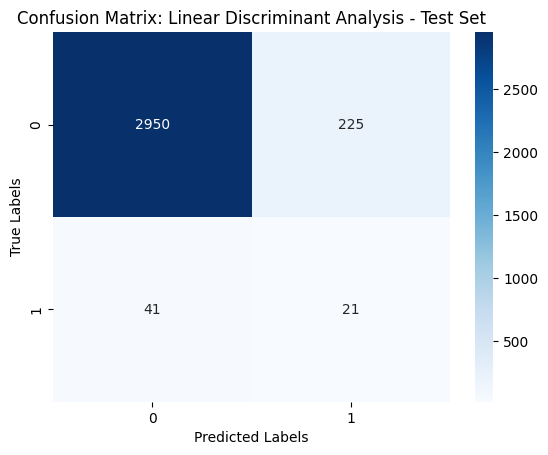

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Logistic Regression- Train Set - Accuracy: 0.8104838709677419 - Recall: 0.3870967741935484 - F1 : 0.5052631578947369 - AUC-ROC : 0.8443750722626893


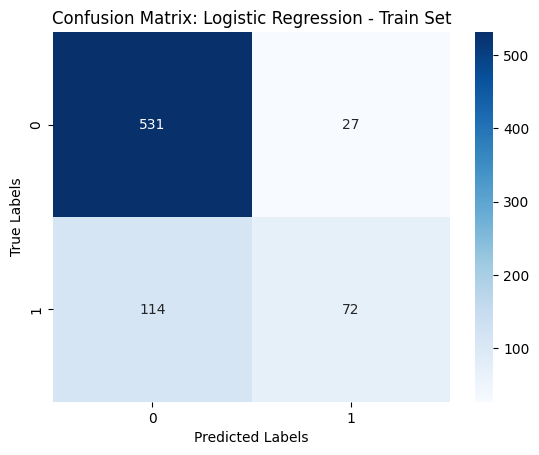

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Logistic Regression- Test Set - Accuracy: 0.9252394192153228 - Recall: 0.3225806451612903 - F1 : 0.14184397163120568 - AUC-ROC : 0.8470256540513081


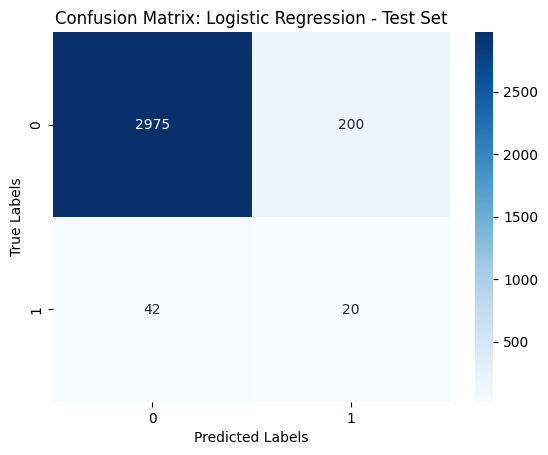

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Decision Tree- Train Set - Accuracy: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


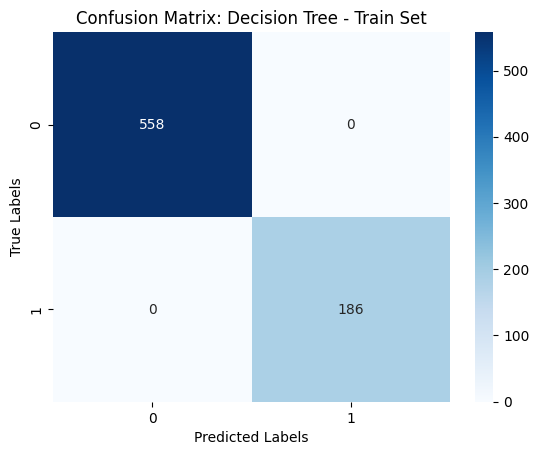

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Decision Tree- Test Set - Accuracy: 0.8492431263515601 - Recall: 0.5 - F1 : 0.11272727272727273 - AUC-ROC : 0.6780314960629922


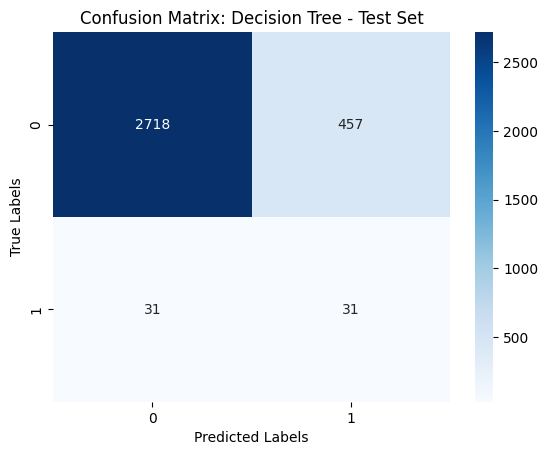

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Random Forest- Train Set - Accuracy: 1.0 - Recall: 1.0 - F1 : 1.0 - AUC-ROC : 1.0


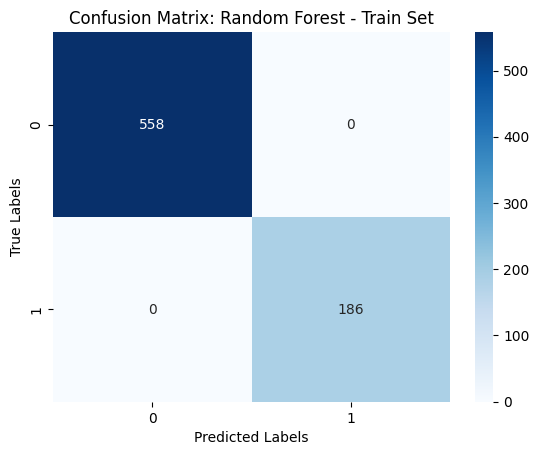

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Random Forest- Test Set - Accuracy: 0.9345072598084646 - Recall: 0.46774193548387094 - F1 : 0.21481481481481482 - AUC-ROC : 0.8803302006604014


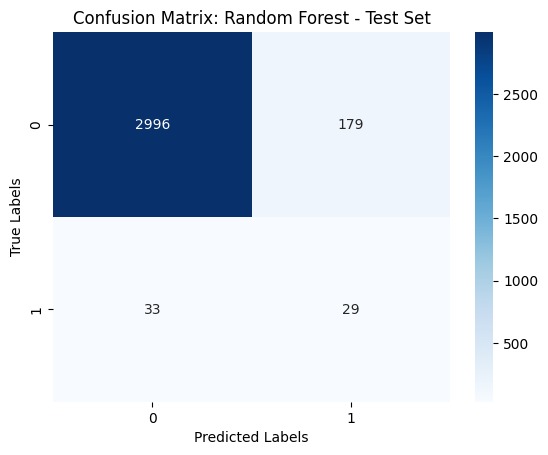

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:kNN- Train Set - Accuracy: 0.8723118279569892 - Recall: 0.6075268817204301 - F1 : 0.7040498442367601 - AUC-ROC : 0.9228186302848114


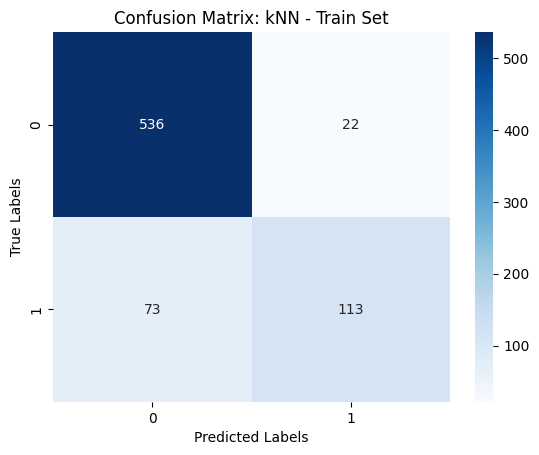

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:kNN- Test Set - Accuracy: 0.897126969416126 - Recall: 0.5 - F1 : 0.1569620253164557 - AUC-ROC : 0.81499618999238


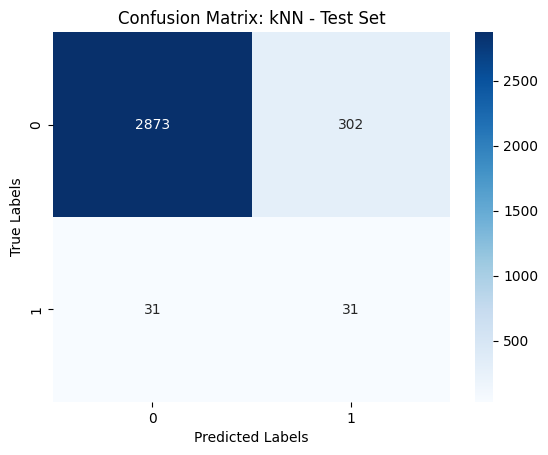

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Naive Bayes- Train Set - Accuracy: 0.8010752688172043 - Recall: 0.5268817204301075 - F1 : 0.5697674418604651 - AUC-ROC : 0.8212702817281381


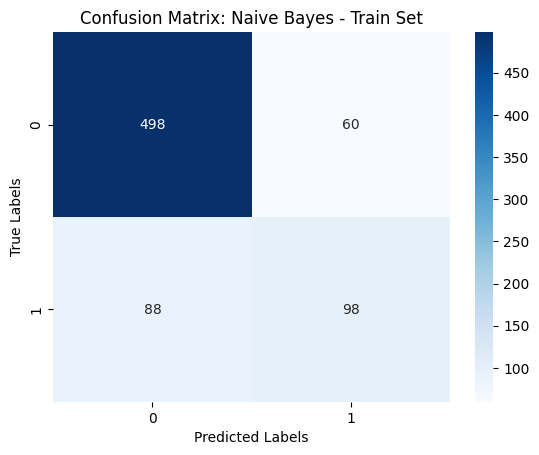

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:Naive Bayes- Test Set - Accuracy: 0.8748841519925857 - Recall: 0.5161290322580645 - F1 : 0.13646055437100213 - AUC-ROC : 0.8392938785877572


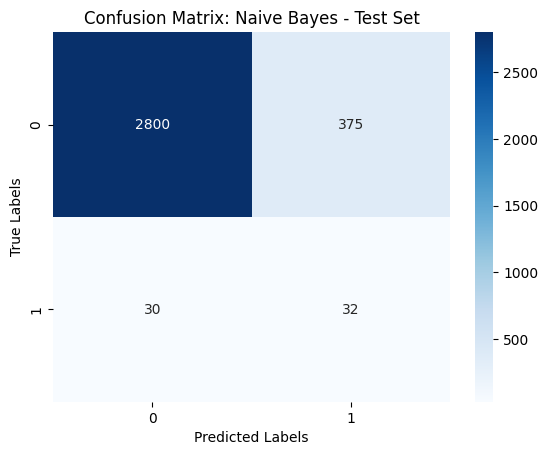

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:SVM- Train Set - Accuracy: 0.8400537634408602 - Recall: 0.46236559139784944 - F1 : 0.5910652920962199 - AUC-ROC : 0.89180830153775


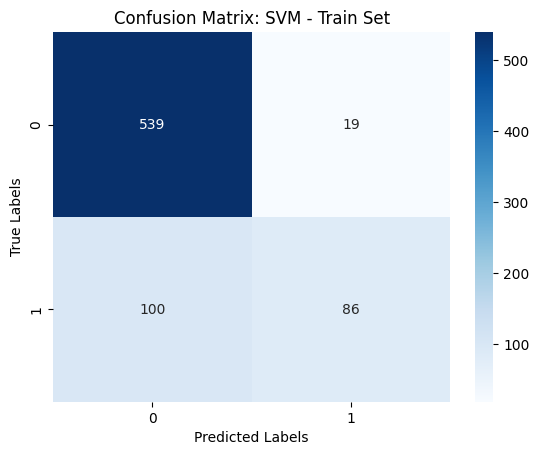

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:SVM- Test Set - Accuracy: 0.9274019153537226 - Recall: 0.3870967741935484 - F1 : 0.1696113074204947 - AUC-ROC : 0.8543357886715773


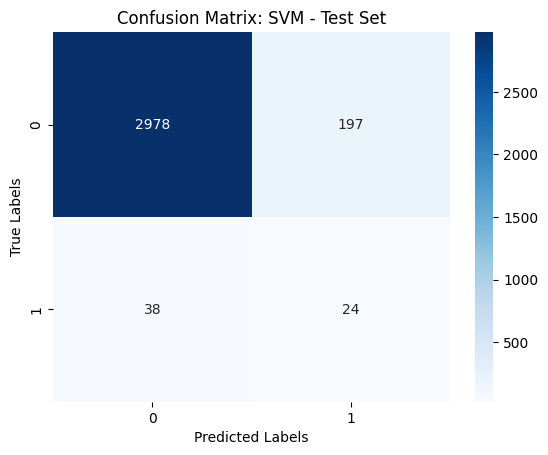

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:MLP- Train Set - Accuracy: 0.8454301075268817 - Recall: 0.5591397849462365 - F1 : 0.6439628482972136 - AUC-ROC : 0.8751108027903034


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


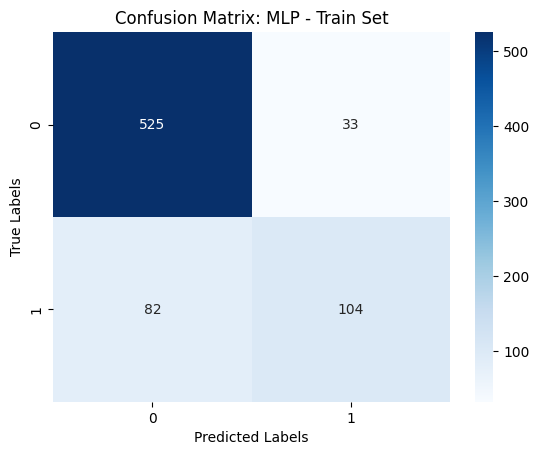

<ipython-input-23-0d9fb0e48bf2>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Fold:4- Model:MLP- Test Set - Accuracy: 0.9060858819894965 - Recall: 0.5 - F1 : 0.16939890710382513 - AUC-ROC : 0.8582931165862331


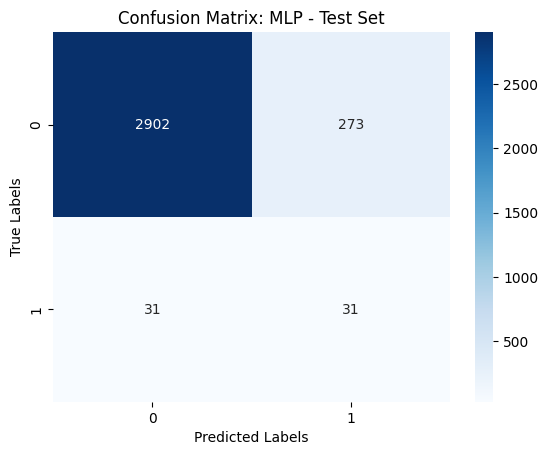

<ipython-input-23-0d9fb0e48bf2>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [23]:
for fold, (train_index, test_index) in enumerate(skf4.split(X,y), 1):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Concatenate X_train and y_train to create a DataFrame for easy manipulation
  train_data = pd.concat([X_train, y_train], axis=1)

# Identify unhealthy and healthy samples
  unhealthy_samples = train_data[train_data['status'] == 1]
  healthy_samples = train_data[train_data['status'] == 0]

# Calculate the number of healthy samples needed to achieve a 3:1 ratio
  desired_healthy_samples = len(unhealthy_samples) * 3

# Randomly select a subset of healthy samples to achieve the desired ratio
  selected_healthy_samples = healthy_samples.sample(n=min(desired_healthy_samples, len(healthy_samples)), random_state=42)

# Concatenate unhealthy samples with the remaining healthy samples to create the balanced training data
  balanced_train_data = pd.concat([unhealthy_samples, selected_healthy_samples])

# Shuffle the dataframe to mix healthy and unhealthy samples
  balanced_train_data = balanced_train_data.sample(frac=1, random_state=42)

# Separate X_train and y_train from the balanced training data
  X_train_balanced = balanced_train_data.drop('status', axis=1)
  y_train_balanced = balanced_train_data['status']

# Move the selected healthy samples from X_train and y_train to X_test and y_test
  X_test = pd.concat([X_test, selected_healthy_samples.drop('status', axis=1)])
  y_test = pd.concat([y_test, selected_healthy_samples['status']])

# Shuffle the test set
  test_shuffle_index = np.random.permutation(len(X_test))
  X_test = X_test.iloc[test_shuffle_index]
  y_test = y_test.iloc[test_shuffle_index]


# Print Results
  print(f"Fold {fold}:")
  print(f"Train - Healthy companies: {y_train_balanced[y_train_balanced==0].count()}, Bankrupt companies: {y_train_balanced[y_train_balanced==1].count()}")
  print(f"Test - Healthy companies: {y_test[y_test==0].count()}, Bankrupt companies: {y_test[y_test==1].count()}")
  print("\n")

  for model_name,model in models.items():
    model.fit(X_train_balanced , y_train_balanced)

    #Train predictions, confusion matrix , scores
    train_predictions = model.predict(X_train_balanced)
    train_cm = confusion_matrix(y_train_balanced , train_predictions)
    train_tp, train_tn, train_fp, train_fn = train_cm[1, 1], train_cm[0, 0], train_cm[0, 1], train_cm[1, 0]
    train_accuracy = (train_tp + train_tn) / (train_tp + train_tn + train_fp + train_fn)
    train_precision = (train_tp)/(train_tp + train_fp)
    train_recall = train_tp / (train_tp + train_fn)
    train_f1 = (2*train_tp) / (2*train_tp + train_fp + train_fn)
    train_roc_auc = roc_auc_score(y_train_balanced, model.predict_proba(X_train_balanced)[:, 1])
    print(f"Fold:{fold}- Model:{model_name}- Train Set - Accuracy: {train_accuracy} - Recall: {train_recall} - F1 : {train_f1} - AUC-ROC : {train_roc_auc}")
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {model_name} - Train Set")
    plt.show()
    result = [model_name , "Train Set" , "Balanced Set" , len(y_train_balanced), y_train_balanced[y_train_balanced==0].count(), train_tp, train_tn, train_fp, train_fn, train_roc_auc]
    results = results.append(pd.Series(result, index=results.columns), ignore_index=True)


    #Test prediction, confusion matrix, scores
    test_predictions = model.predict(X_test)
    test_cm = confusion_matrix(y_test , test_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_tp, test_tn, test_fp, test_fn = test_cm[1, 1], test_cm[0, 0],  test_cm[0, 1], test_cm[1, 0]
    test_accuracy = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)
    test_precision = (test_tp)/(test_tp + test_fp)
    test_recall = test_tp / (test_tp + test_fn)
    test_f1 = (2*test_tp) / (2*test_tp + test_fp + test_fn)
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Fold:{fold}- Model:{model_name}- Test Set - Accuracy: {test_accuracy} - Recall: {test_recall} - F1 : {test_f1} - AUC-ROC : {test_roc_auc}")
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix: {model_name} - Test Set")
    plt.show()
    result = [model_name , "Test Set" , "Balanced Set" , len(y_test), y_test[y_test==0].count(), test_tp, test_tn, test_fp, test_fn, test_roc_auc]
    results = results.append(pd.Series(result, index=results.columns), ignore_index=True)




**Create .xlsx file**


In [25]:
from google.colab import files

#Create file
results.to_excel('results.xlsx', index=False)

#Download file
files.download('results.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>